In [1]:
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import cv2
import numpy as np


## Helpers

In [2]:
#highlight landmarks
def highlight_landmarks(Img, landmarks):
    # Center coordinates, converted float to int
    center_coordinates_left_eye = np.array(landmarks["left_eye"]).astype(int)
    center_coordinates_right_eye = np.array(landmarks["right_eye"]).astype(int)
    center_coordinates_nose = np.array(landmarks["nose"]).astype(int)
    center_coordinates_mouth_left = np.array(landmarks["mouth_left"]).astype(int)
    center_coordinates_mouth_right = np.array(landmarks["mouth_right"]).astype(int)
    
    # Radius of circle
    radius = 10
    
    # Red color in RGB
    color = (255, 0, 0)
    
    # Line thickness of 2 px
    thickness = 1
    
    # Using cv2.circle() method
    # Draw a circle with blue line borders of thickness of 2 px
    mImg = cv2.circle(Img, center_coordinates_left_eye, radius, color, thickness)
    mImg = cv2.circle(mImg, center_coordinates_right_eye, radius, color, thickness)
    mImg = cv2.circle(mImg, center_coordinates_nose, radius, color, thickness)
    mImg = cv2.circle(mImg, center_coordinates_mouth_left, radius, color, thickness)
    mImg = cv2.circle(mImg, center_coordinates_mouth_right, radius, color, thickness)

    return mImg


#highlight facial area
def highlight_facial_area(Img, facial_area):
    # Red color in RGB
    color = (255, 255, 255)
    
    # Line thickness of 2 px
    thickness = 5

    mImg = cv2.rectangle(Img, (facial_area[2], facial_area[3])
    , (facial_area[0], facial_area[1]), color, thickness)

    return mImg


#highlight facial area
def highlight_eye_line(Img, facial_area, landmarks):
    # coordinates
    x1 = facial_area[0]
    y1 = int(landmarks["right_eye"][1])
    x2 = facial_area[2]
    y2 = y1

    # Red color in RGB
    color = (255, 0, 0)
    
    # Line thickness of 2 px
    thickness = 1

    mImg = cv2.line(Img, (x1, y1), (x2, y2), color, thickness=1)

    return mImg

## Images

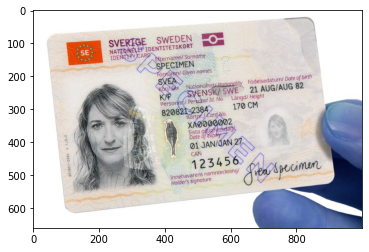

In [3]:
img_path = "sweID.jfif"
# img_path = "soID.jpg"
img = cv2.imread(img_path)
plt.imshow(img)

In [4]:
faces = RetinaFace.detect_faces(img, threshold = 0.92)
num_of_faces = len(list(faces.keys()))
print(faces.keys())
print(num_of_faces)

dict_keys(['face_1', 'face_2'])
2


## Alignment

2


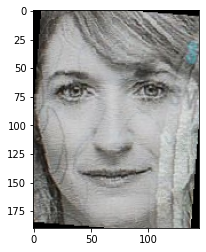

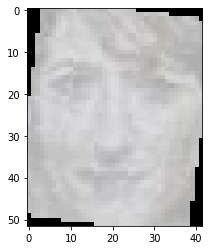

In [5]:
#face detection and alignment
faces_a = RetinaFace.extract_faces(img_path = img, align = True)
num_of_faces = len(faces_a)
print(num_of_faces)
for face in faces_a:
  plt.imshow(face)
  plt.show()


## Align on first face

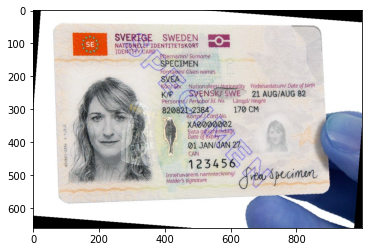

In [6]:
identity = faces['face_1']
facial_area = identity["facial_area"]
landmarks = identity["landmarks"]

# https://github.com/serengil/retinaface/blob/master/retinaface/commons/postprocess.py#L13
img_align = RetinaFace.postprocess.alignment_procedure(img, landmarks["right_eye"],  landmarks["left_eye"], landmarks["nose"])
plt.imshow(img_align)

# for later use
faces_align = RetinaFace.detect_faces(img_path = img_align)

## Highlight

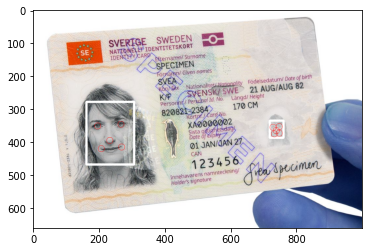

In [7]:
for faceId in faces.keys():
   # print(faceId)

   identity = faces[faceId]
   
   facial_area = identity["facial_area"]
   landmarks = identity["landmarks"]
   
   #highlight facial area
   img = highlight_facial_area(img, facial_area)
   img = highlight_landmarks(img, landmarks)

# view
plt.imshow(img)

## Plot facial

In [8]:
# select first face
identity = faces['face_1']
facial_area = identity["facial_area"]
landmarks = identity["landmarks"]

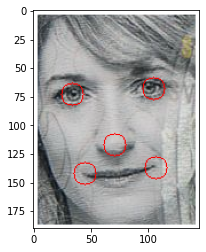

In [9]:
facial_img = img[facial_area[1]: facial_area[3], facial_area[0]: facial_area[2]]
plt.imshow(facial_img)

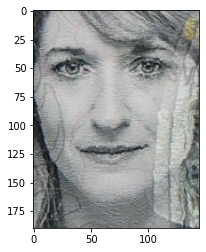

In [10]:
facial_img = img_align[facial_area[1]: facial_area[3], facial_area[0]: facial_area[2]]
plt.imshow(facial_img)

## Show alignment with vertical line

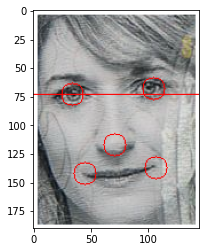

In [11]:
img_eye = highlight_eye_line(img, facial_area, landmarks)
facial_img_eye = img_eye[facial_area[1]: facial_area[3], facial_area[0]: facial_area[2]]
plt.imshow(facial_img_eye)

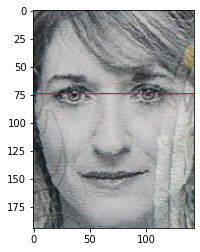

In [14]:
# use aligned face
identity = faces_align['face_1']
facial_area = identity["facial_area"]
landmarks = identity["landmarks"]
# view vertical line
img_eye_align = highlight_eye_line(img_align, facial_area, landmarks)
facial_img_eye_align = img_eye_align[facial_area[1]: facial_area[3], facial_area[0]: facial_area[2]]
plt.imshow(facial_img_eye_align)